In [2]:
import matplotlib.pyplot as plt

from poles_roots.global_zero_pole import find_zeros_poles
from poles_roots import reference_problems
from poles_roots.plotting import phase_plot, plot_poles_zeros

## Pole on diagonal

The first possible edge case is that a pole lies on a diagonal of the triangulation. We can detect this as the quadrature will not converge. In which case we break the diagonal on which the quadrature does not converge. This is shown in the following example.

/tmp/ipykernel_22793/4130029405.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  lambda z: -1/z**2,
/tmp/ipykernel_22793/4130029405.py:3: RuntimeWarning: invalid value encountered in scalar divide
  lambda z: -1/z**2,
/tmp/ipykernel_22793/4130029405.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  lambda z: 1/z,
/tmp/ipykernel_22793/4130029405.py:2: RuntimeWarning: invalid value encountered in scalar divide
  lambda z: 1/z,
/home/jakeb/development/poles-and-roots/src/poles_roots/integration.py:43: RuntimeWarning: invalid value encountered in scalar divide
  return f_jac(t) / f(t)
/home/jakeb/development/poles-and-roots/venv/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determ

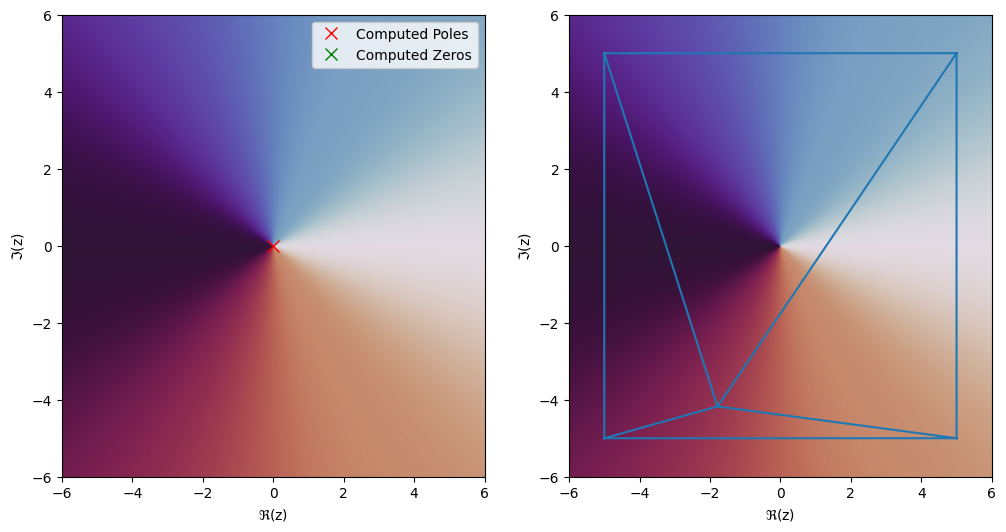

In [4]:
res = find_zeros_poles(
    lambda z: 1/z,
    lambda z: -1/z**2,
    points=[-5 - 5j, 5 - 5j, 5 + 5j, -5 + 5j],
    arg_principal_threshold=1.1,
    num_sample_points=50,
)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
phase_plot(lambda z: 1/z, axs[0], domain=[-6, 6, -6, 6])
phase_plot(lambda z: 1/z, axs[1], domain=[-6, 6, -6, 6])
plot_poles_zeros(res, axs[0])
axs[0].legend()
axs[1].triplot(res.points[:, 0], res.points[:, 1], res.simplices)
plt.show()